In [17]:
using DrWatson
@quickactivate "Doran_etal_2022"

using Muon, CSV, DataFrames
using StatsBase, LinearAlgebra
using SPI
using StatsPlots
theme(:default, grid=false, tickdir=:out, label="")

In [2]:
uniprot = readh5ad(datadir("exp_pro", "UP7047", "2020_02_UP7047.h5ad"))

AnnData object 7047 ✕ 10177

In [6]:
mtx = uniprot.X[:, :];

In [7]:
usv = svd(mtx);

In [34]:
probsoggs = mapslices(mtx, dims=1) do col
    mean(col.>0)
end |> vec
sum(probsoggs .> .90)

341

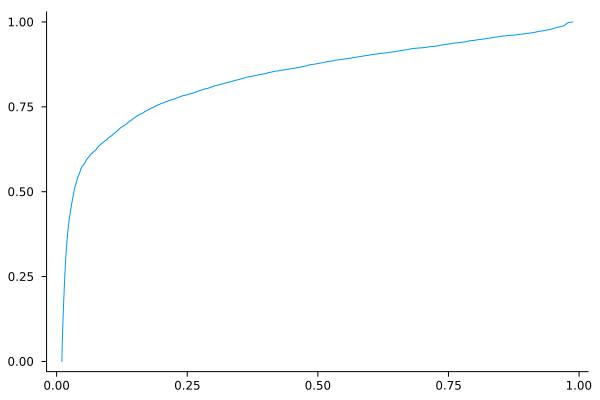

In [36]:
plot(ecdf(probsoggs))

In [47]:
@which ecdf(rand([0,1], 100))

ecdf(X::AbstractVector{T} where T<:Real; weights)
     @ StatsBase ~/.julia/packages/StatsBase/XgjIN/src/empirical.jl:56

In [46]:
ecdf(rand([0,1], 100))

ECDF{Vector{Int64}, Weights{Float64, Float64, Vector{Float64}}}([0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Float64[])

In [51]:
entropy([.5, .5], 2)

1.0

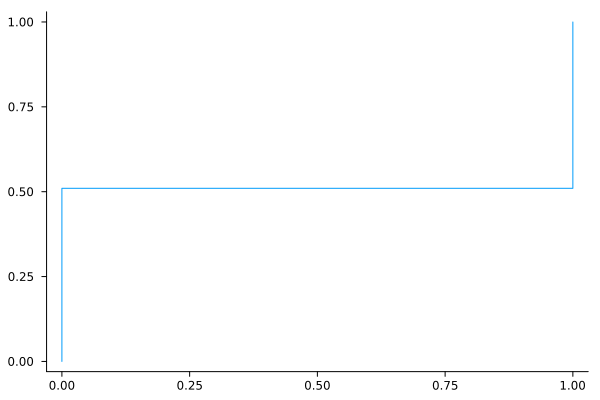

In [37]:
plot(ecdf(rand([0,1], 100)))

In [27]:
tmtx = projectout(usv, 1:1)
probstoggs = mapslices(tmtx, dims=1) do col
    mean(col.>0)
end |> vec
sum(probstoggs .> .95)

10177

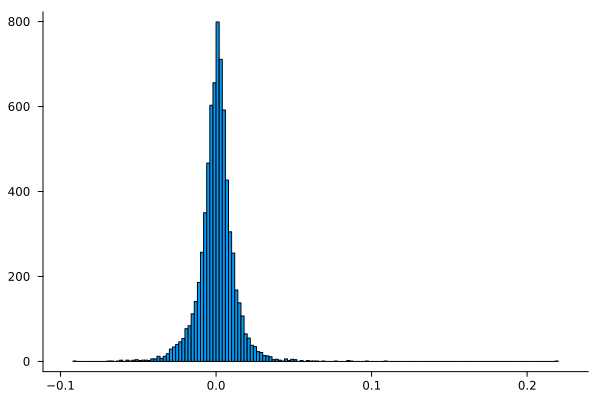

In [59]:
histogram(usv.U[:,20])